In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [9]:
def gaussian(x, mean, sigma):
    return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x-mean)**2/sigma**2)

In [65]:
mean1 = 0
mean2 = 0
mean3 = 0.2
sigma1 = 1
sigma2 = 1
sigma3 = 1
n_repeats=1000
x = np.linspace(-3, 3, 1000)

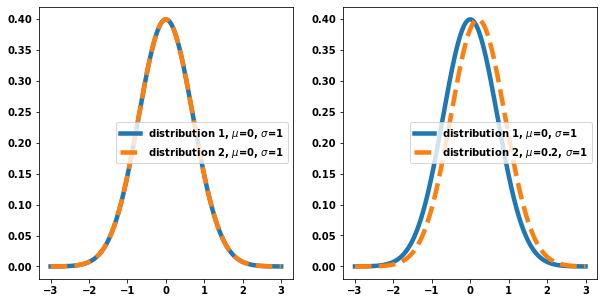

In [53]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
_ = axes[0].plot(x, gaussian(x, mean1, sigma1), label=f'distribution 1, $\\mu$={mean1}, $\\sigma$={sigma1}', linewidth=4.5)
_ = axes[0].plot(x, gaussian(x, mean2, sigma2), label = f'distribution 2, $\\mu$={mean2}, $\\sigma$={sigma2}', linestyle='--', linewidth=4.5)
axes[0].legend()

_ = axes[1].plot(x, gaussian(x, mean1, sigma1), label=f'distribution 1, $\\mu$={mean1}, $\\sigma$={sigma1}', linewidth=4.5)
_ = axes[1].plot(x, gaussian(x, mean3, sigma2), label = f'distribution 2, $\\mu$={mean3}, $\\sigma$={sigma3}', linestyle='--', linewidth=4.5)
axes[1].legend()

In [54]:
results12 = []
results13 = []
for i in range(n_repeats):
    result = stats.ttest_ind(np.random.normal(loc=mean1, scale=sigma1, size=1000),
                             np.random.normal(loc=mean2, scale=sigma2, size=1000))
    results12.append(result.pvalue)
    
    result = stats.ttest_ind(np.random.normal(loc=mean1, scale=sigma1, size=1000),
                             np.random.normal(loc=mean3, scale=sigma2, size=1000))
    results13.append(result.pvalue)

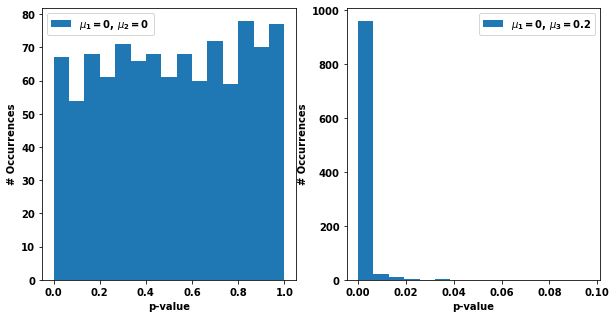

In [59]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
_ = axes[0].hist(results12, 15, label=f'$\\mu_1=${mean1}, $\\mu_2=${mean2}')
_ = axes[1].hist(results13, 15, label=f'$\\mu_1=${mean1}, $\\mu_3=${mean3}')
axes[0].set_xlabel('p-value')
axes[1].set_xlabel('p-value')
axes[0].set_ylabel('# Occurrences')
axes[1].set_ylabel('# Occurrences')
axes[0].legend()
axes[1].legend()

In [70]:
results = results12 + results13
ids = [0] * n_repeats + [1] * n_repeats
results_sorted = np.sort(results)
ids_sorted = np.asarray(ids)[np.argsort(results)]

(0.0, 0.1)

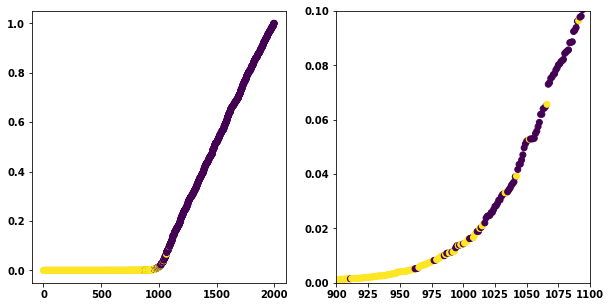

In [74]:
ranks = stats.rankdata(results_sorted)
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
axes[0].scatter(ranks, results_sorted, c=ids_sorted)
axes[1].scatter(ranks, results_sorted, c=ids_sorted)
axes[1].set_xlim(900, 1100)
axes[1].set_ylim(0, 0.1)

In [ ]:
KüNsTliChe IntElLiGenZ